<a href="https://colab.research.google.com/github/vanshita9414/Arima-/blob/master/mass_body_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

In [2]:
uploaded=files.upload()

Saving mass.csv to mass.csv


In [3]:
df=pd.read_csv(io.StringIO(uploaded['mass.csv'].decode('utf-8')))
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
gender=LabelEncoder()
df['Gender']=gender.fit_transform(df['Gender'])

In [6]:
df.describe()


,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.490000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


In [7]:
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit','slightly_overweight','overweight','extremely_overweight']
df['Index']=pd.cut(df['Index'], bins=bins, labels=health)

In [8]:
df['Index']

0                overweight
1                       fit
2                overweight
3       slightly_overweight
4       slightly_overweight
               ...         
495    extremely_overweight
496              overweight
497    extremely_overweight
498    extremely_overweight
499    extremely_overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): [malnourished < underweight < fit < slightly_overweight < overweight <
                         extremely_overweight]

In [9]:
df['Index'].value_counts()

extremely_overweight    198
overweight              130
fit                      69
slightly_overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

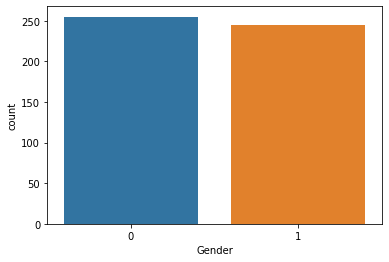

In [10]:
sns.countplot(df['Gender'])

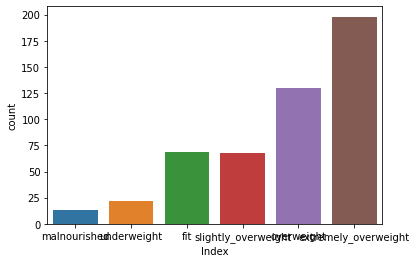

In [11]:
sns.countplot(df['Index'])

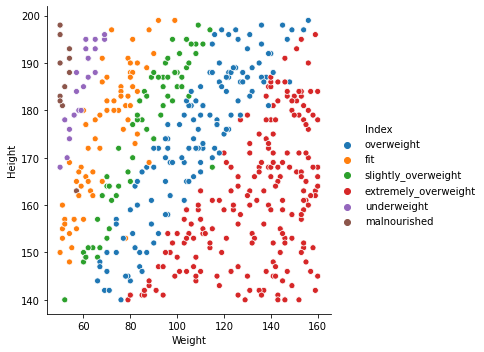

In [12]:
sns.relplot(x='Weight',y='Height',hue="Index",data=df)

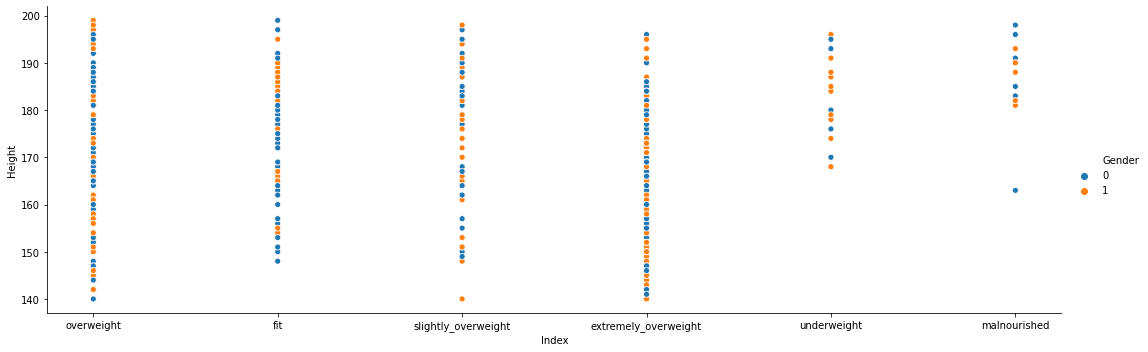

In [13]:
sns.relplot(x='Index',y='Height',hue="Gender",data=df,height=5,aspect=3)

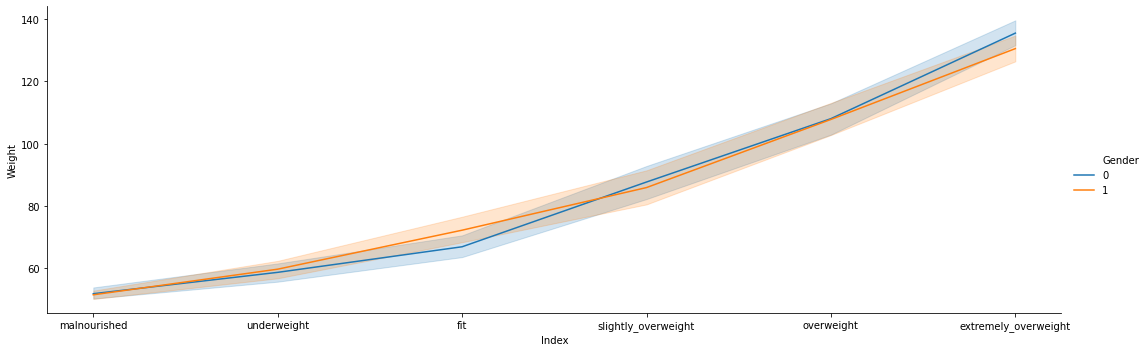

In [14]:
sns.relplot(x='Index',y='Weight',hue="Gender",kind='line',data=df,height=5,aspect=3)

In [15]:
X=df.drop('Index',axis=1)
y=df['Index']


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)


In [18]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [19]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

extremely_overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly_overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [21]:
print(accuracy_score(y_test,pred))

0.85
